## **CUSTOMER SEGMENTATION**




In [ ]:
import pandas as pd
import numpy as np
import pandas_profiling
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
files.upload()

Saving Purchases.csv to Purchases.csv


{'Purchases.csv': b'Customer id,purchase amount,date of purchase\r\n760,25,11/6/2009\r\n860,50,9/28/2012\r\n1200,100,10/25/2005\r\n1420,50,7/9/2009\r\n1940,70,1/25/2013\r\n1960,40,10/29/2013\r\n2620,30,3/9/2006\r\n3050,50,4/12/2007\r\n3120,150,11/8/2006\r\n3260,45,10/20/2010\r\n3510,35,5/4/2013\r\n3970,30,6/7/2007\r\n4000,20,11/25/2005\r\n4180,20,9/22/2010\r\n4390,30,4/15/2011\r\n4750,60,12/2/2013\r\n4840,30,10/14/2005\r\n4910,15,12/13/2006\r\n4950,50,5/19/2010\r\n4970,30,12/1/2006\r\n5250,50,12/20/2005\r\n5480,100,6/6/2014\r\n5990,30,3/17/2006\r\n6240,100,11/9/2006\r\n6390,15,10/25/2005\r\n6570,30,11/10/2012\r\n6600,50,9/23/2005\r\n6690,20,3/10/2010\r\n6690,15,11/4/2010\r\n6690,15,12/10/2013\r\n6710,80,5/3/2013\r\n6940,30,12/31/2013\r\n7000,10,4/5/2013\r\n7210,40,10/28/2009\r\n7450,25,5/23/2008\r\n7560,40,12/31/2008\r\n7660,30,6/3/2006\r\n7660,50,3/28/2013\r\n7730,150,10/22/2010\r\n7740,100,8/9/2007\r\n7790,20,7/4/2014\r\n8060,30,4/12/2007\r\n8240,30,6/7/2007\r\n8190,20,12/9/2006\r\n8

##**DATA WRANGLING**

In [ ]:
rfm=pd.read_csv('Purchases.csv')

In [ ]:
rfm.head()

,Customer id,purchase amount,date of purchase
0,760,25.0,11/6/2009
1,860,50.0,9/28/2012
2,1200,100.0,10/25/2005
3,1420,50.0,7/9/2009
4,1940,70.0,1/25/2013


In [ ]:
rfm.shape

(51243, 3)

In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer id       51243 non-null  int64  
 1   purchase amount   51243 non-null  float64
 2   date of purchase  51243 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ MB


In [ ]:
rfm.isna().sum()

Customer id         0
purchase amount     0
date of purchase    0
dtype: int64

In [ ]:
rfm['date of purchase']=pd.to_datetime(rfm['date of purchase'])

In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer id       51243 non-null  int64         
 1   purchase amount   51243 non-null  float64       
 2   date of purchase  51243 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.2 MB


In [ ]:
rfm['year of purchase']=rfm['date of purchase'].dt.year
rfm['day of purchase']=rfm['date of purchase'].dt.weekday
rfm['month of purchase']=rfm['date of purchase'].dt.month


print(rfm)

       Customer id  purchase amount  ... day of purchase  month of purchase
0              760             25.0  ...               4                 11
1              860             50.0  ...               4                  9
2             1200            100.0  ...               1                 10
3             1420             50.0  ...               3                  7
4             1940             70.0  ...               4                  1
...            ...              ...  ...             ...                ...
51238       163230             30.0  ...               5                 11
51239       154410            100.0  ...               4                 11
51240       189270             30.0  ...               1                 12
51241       173810             30.0  ...               3                  5
51242         9830             50.0  ...               2                 11

[51243 rows x 6 columns]


In [ ]:
rfm['Customer id'].nunique() #No of unique customer ids

18417

In [ ]:
rfm.groupby('Customer id',as_index=True).agg({'purchase amount':np.mean}).sort_values('purchase amount',ascending=False).head(5)
#Customer id 222740 and 246480 have the highest average purchase aamount

,purchase amount
Customer id,
222740,4500.0
246480,4500.0
126120,4000.0
216730,4000.0
247870,4000.0


In [ ]:
df=rfm.groupby('year of purchase',as_index=True).agg({'purchase amount':[np.mean,np.sum]})
df=pd.DataFrame(df)
#Purchase amount is increasing year on year
print(df)



                 purchase amount           
                            mean        sum
year of purchase                           
2005                   55.826122   82064.40
2006                   52.250454  114010.49
2007                   49.264014  230260.00
2008                   53.071780  229853.88
2009                   50.745253  256466.51
2010                   58.740012  290116.92
2011                   63.519300  303939.85
2012                   62.913312  374963.34
2013                   67.931357  401610.18
2014                   75.390347  432665.20
2015                   77.197697  478394.13


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
rfm.groupby('day of purchase',as_index=True).agg({'purchase amount':[np.mean,np.sum]})
#We see average purchase amount is highest on wednesday eventhough it is similar on each day

purchase amount           
                           mean        sum
day of purchase                           
0                     85.768586   81909.00
1                     71.647469  403088.66
2                     59.617213  832852.47
3                     67.539180  560034.88
4                     56.706498  727430.95
5                     59.957330  481037.66
6                     69.716772  107991.28

In [ ]:
rfm_month=rfm.groupby('month of purchase',as_index=True).agg({'purchase amount':[np.mean,np.sum]})
rfm_month.reset_index()

month of purchase purchase amount            
                                mean         sum
0                  1       50.291987    76192.36
1                  2       51.742945    80822.48
2                  3       51.568173   169040.47
3                  4       50.669610   214535.13
4                  5       87.074370   279160.43
5                  6       70.355205   219930.37
6                  7       52.290516   165185.74
7                  8       48.838925    75846.85
8                  9       68.749223   190297.85
9                 10       54.430402   303177.34
10                11       55.052787   351456.99
11                12       71.782569  1068698.89

In [ ]:
rfm_month.columns

MultiIndex([('purchase amount', 'mean'),
            ('purchase amount',  'sum')],
           )

Text(0.5, 1.0, 'Sum of Monthly sales over 10 years')

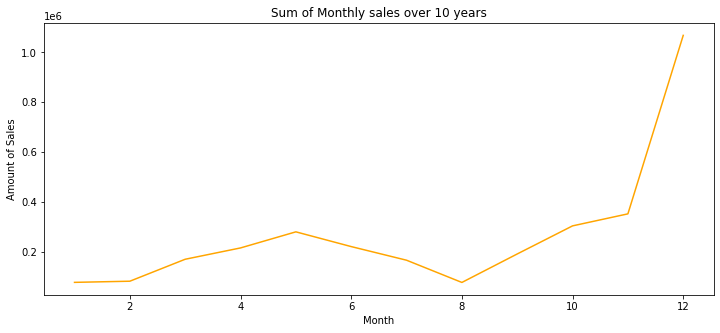

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(rfm_month[('purchase amount',  'sum')],color='orange')
plt.xlabel('Month')
plt.ylabel('Amount of Sales')
plt.title('Sum of Monthly sales over 10 years')

In [ ]:
rfm.describe()

,Customer id,purchase amount,year of purchase,day of purchase,month of purchase
count,51243.000000,51243.000000,51243.000000,51243.000000,51243.000000
mean,108934.547938,62.337195,2010.869699,3.106044,8.395761
std,67650.610139,156.606801,2.883072,1.420202,3.526799
min,10.000000,5.000000,2005.000000,0.000000,1.000000
25%,57720.000000,25.000000,2009.000000,2.000000,5.000000
50%,102440.000000,30.000000,2011.000000,3.000000,10.000000
75%,160525.000000,60.000000,2013.000000,4.000000,12.000000
max,264200.000000,4500.000000,2015.000000,6.000000,12.000000


In [ ]:
rfm.columns

Index(['Customer id', 'purchase amount', 'date of purchase',
       'year of purchase', 'day of purchase', 'month of purchase'],
      dtype='object')

In [ ]:
#extracting Monetary Value
monetary = rfm.groupby('Customer id').agg({'purchase amount':np.sum})
monetary = monetary.reset_index()
monetary.head()

,Customer id,purchase amount
0,10,30.0
1,80,500.0
2,90,1158.0
3,120,20.0
4,130,100.0


In [ ]:
#extracting Frequency
frequency=rfm['Customer id'].value_counts()
type(frequency)
k=pd.DataFrame(frequency)
k=k.reset_index()
k.columns = ['Customer id', "Frequency"]
k.head()


,Customer id,Frequency
0,9720,45
1,109370,41
2,119430,38
3,10720,37
4,10640,34


In [ ]:
#creating master dataset
master = monetary.merge(k, on = 'Customer id', how = "inner")
master.head()

,Customer id,purchase amount,Frequency
0,10,30.0,1
1,80,500.0,7
2,90,1158.0,10
3,120,20.0,1
4,130,100.0,2


In [ ]:
recency  = rfm[['Customer id','date of purchase']]


In [ ]:
max_date=max(recency['date of purchase'])

In [ ]:
max_date

Timestamp('2015-12-31 00:00:00')

In [ ]:
#extracting recency
max_date = max_date + pd.DateOffset(days=1)
recency['diff'] = max_date - recency['date of purchase']
recency.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Customer id,date of purchase,diff
0,760,2009-11-06,2247 days
1,860,2012-09-28,1190 days
2,1200,2005-10-25,3720 days
3,1420,2009-07-09,2367 days
4,1940,2013-01-25,1071 days


In [ ]:
recency['date of purchase'].min()

Timestamp('2005-01-02 00:00:00')

In [ ]:
a = recency.groupby('Customer id').agg({'diff':np.min})


In [ ]:
a.reset_index(inplace=True)
a

,Customer id,diff
0,10,3829 days
1,80,343 days
2,90,758 days
3,120,1401 days
4,130,2970 days
...,...,...
18412,263820,1 days
18413,263870,135 days
18414,263880,34 days
18415,263890,5 days


In [ ]:
RFM = k.merge(monetary, on = 'Customer id')
RFM = RFM.merge(a, on = 'Customer id')
RFM.head()

,Customer id,Frequency,purchase amount,diff
0,9720,45,2005.0,29 days
1,109370,41,695.0,1 days
2,119430,38,560.9,301 days
3,10720,37,970.0,34 days
4,10640,34,563.2,36 days


In [ ]:
RFM

,Customer id,Frequency,purchase amount,diff
0,9720,45,2005.0,29 days
1,109370,41,695.0,1 days
2,119430,38,560.9,301 days
3,10720,37,970.0,34 days
4,10640,34,563.2,36 days
...,...,...,...,...
18412,71860,1,40.0,3159 days
18413,2230,1,8.0,3362 days
18414,170180,1,100.0,1444 days
18415,15660,1,50.0,3908 days


In [ ]:
RFM['diff']=RFM['diff'].dt.days

In [ ]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18417 entries, 0 to 18416
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer id      18417 non-null  int64  
 1   Frequency        18417 non-null  int64  
 2   purchase amount  18417 non-null  float64
 3   diff             18417 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 719.4 KB


In [ ]:
RFM.describe()

,Customer id,Frequency,purchase amount,diff
count,18417.000000,18417.000000,18417.000000,18417.000000
mean,137573.510887,2.782375,173.445453,1253.037900
std,69504.599881,2.936888,540.339224,1081.437868
min,10.000000,1.000000,5.000000,1.000000
25%,81990.000000,1.000000,30.000000,244.000000
50%,136430.000000,2.000000,60.000000,1070.000000
75%,195100.000000,3.000000,150.000000,2130.000000
max,264200.000000,45.000000,24350.000000,4014.000000


In [ ]:
RFM_norm1 = RFM.drop(['Customer id'], axis=1)

**KMeans Clustering**

In [ ]:
sc=StandardScaler()
RFM_norm1 = sc.fit_transform(RFM_norm1)

In [ ]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['Frequency','Amount','Recency']
RFM_norm1.head()

,Frequency,Amount,Recency
0,14.375341,3.389730,-1.131892
1,13.013319,0.965262,-1.157784
2,11.991802,0.717077,-0.880368
3,11.651296,1.474215,-1.127269
4,10.629779,0.721334,-1.125419


In [ ]:
kmeans=KMeans(n_clusters=6,max_iter=500,n_init=50,random_state=123456)
kmeans.fit(RFM_norm1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=123456, tol=0.0001, verbose=0)

In [ ]:
kpred=kmeans.predict(RFM_norm1)

In [ ]:
RFM_norm1['labels']=kpred

In [ ]:
RFM_norm1

,Frequency,Amount,Recency,labels
0,14.375341,3.389730,-1.131892,2
1,13.013319,0.965262,-1.157784,2
2,11.991802,0.717077,-0.880368,2
3,11.651296,1.474215,-1.127269,2
4,10.629779,0.721334,-1.125419,2
...,...,...,...,...
18412,-0.606909,-0.246973,1.762481,1
18413,-0.606909,-0.306196,1.950199,1
18414,-0.606909,-0.135928,0.176586,0
18415,-0.606909,-0.228465,2.455096,1


In [ ]:
RFM_norm1['labels'].value_counts()

0    8046
1    6235
4    2928
2    1084
5     105
3      19
Name: labels, dtype: int64

In [ ]:
silhouette_score(RFM_norm1,RFM_norm1.labels)

0.6386725347863927

In [ ]:
kmeans.cluster_centers_

array([[-0.41848184, -0.17923852, -0.54645972],
       [-0.43198665, -0.20167333,  1.21677106],
       [ 2.92054178,  0.83979963, -0.94955025],
       [ 1.36443989, 20.88584242, -0.82313312],
       [ 0.9239703 ,  0.22873883, -0.70788066],
       [ 1.54962719,  6.88059135, -0.68615081]])

In [ ]:
RFM_km = pd.concat([RFM, pd.Series(RFM_norm1['labels'])], axis=1)

In [ ]:
RFM_km

,Customer id,Frequency,purchase amount,diff,labels
0,9720,45,2005.0,29,2
1,109370,41,695.0,1,2
2,119430,38,560.9,301,2
3,10720,37,970.0,34,2
4,10640,34,563.2,36,2
...,...,...,...,...,...
18412,71860,1,40.0,3159,1
18413,2230,1,8.0,3362,1
18414,170180,1,100.0,1444,0
18415,15660,1,50.0,3908,1


In [ ]:
df1=RFM_km.groupby('labels').agg({'Frequency':[np.mean],'purchase amount':[np.mean,np.sum],'diff':[np.mean,'count']})

In [ ]:
df1.reset_index()



labels  Frequency purchase amount                    diff      
               mean            mean        sum         mean count
0      0   1.553194       76.552073  615937.98   662.137335  8046
1      1   1.513713       64.476403  402010.37  2568.864475  6235
2      2  11.363469      626.635286  679272.65   226.393911  1084
3      3   6.789474    11458.578947  217713.00   362.894737    19
4      4   5.495560      297.416366  870835.12   487.297814  2928
5      5   7.333333     3891.197905  408575.78   511.028571   105

In [ ]:
df1.columns

MultiIndex([(      'Frequency',  'mean'),
            ('purchase amount',  'mean'),
            ('purchase amount',   'sum'),
            (           'diff',  'mean'),
            (           'diff', 'count')],
           )

In [ ]:
df1['contribution of each segment']=round((df1[('purchase amount',   'sum')]/np.sum(df1[('purchase amount',   'sum')])*100),2)

In [ ]:
df1

Frequency purchase amount  ...  diff contribution of each segment
             mean            mean  ... count                             
labels                             ...                                   
0        1.553194       76.552073  ...  8046                        19.28
1        1.513713       64.476403  ...  6235                        12.59
2       11.363469      626.635286  ...  1084                        21.26
3        6.789474    11458.578947  ...    19                         6.82
4        5.495560      297.416366  ...  2928                        27.26
5        7.333333     3891.197905  ...   105                        12.79

[6 rows x 6 columns]

In [ ]:
RFM = RFM.rename(columns={'purchase amount': 'Monetary', 'diff': 'Recency'})

Manegarial Segmentation


In [ ]:
RFM

,Customer id,Frequency,Monetary,Recency
0,9720,45,2005.0,29
1,109370,41,695.0,1
2,119430,38,560.9,301
3,10720,37,970.0,34
4,10640,34,563.2,36
...,...,...,...,...
18412,71860,1,40.0,3159
18413,2230,1,8.0,3362
18414,170180,1,100.0,1444
18415,15660,1,50.0,3908


In [ ]:
# --Calculate R and F groups--
# Create labels for Recency and Frequency
r_labels = range(8, 0, -1); f_labels = range(1,9)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(RFM['Recency'],q=8, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.cut(RFM['Frequency'],bins=8, labels=f_labels)

# Create new columns R and F 
RFM = RFM.assign(R = r_groups.values,F=f_groups.values)

RFM.head()


,Customer id,Frequency,Monetary,Recency,R,F
0,9720,45,2005.0,29,8,8
1,109370,41,695.0,1,8,8
2,119430,38,560.9,301,6,7
3,10720,37,970.0,34,8,7
4,10640,34,563.2,36,8,6


In [ ]:
m_labels = range(1,9)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(RFM['Monetary'], q=8, labels=m_labels)
# Create new column M
RFM = RFM.assign(M = m_groups.values)

In [ ]:
f_groups.value_counts()

1    16477
2     1700
3      170
4       54
5        9
6        3
8        2
7        2
Name: Frequency, dtype: int64

In [ ]:
RFM['RFM_Score'] = RFM[['R','F','M']].sum(axis=1)
print(RFM['RFM_Score'].head())

0    24.0
1    24.0
2    21.0
3    23.0
4    22.0
Name: RFM_Score, dtype: float64


In [ ]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18417 entries, 0 to 18416
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Customer id  18417 non-null  int64   
 1   Frequency    18417 non-null  int64   
 2   Monetary     18417 non-null  float64 
 3   Recency      18417 non-null  int64   
 4   R            18417 non-null  category
 5   F            18417 non-null  category
 6   M            18417 non-null  category
 7   RFM_Score    18417 non-null  float64 
dtypes: category(3), float64(2), int64(3)
memory usage: 917.6 KB


In [ ]:
RFM['RFM_Score'].describe()

count    18417.000000
mean         9.925992
std          4.129660
min          3.000000
25%          7.000000
50%         10.000000
75%         13.000000
max         24.000000
Name: RFM_Score, dtype: float64

In [ ]:
# Define rfm_level function
def rfm_level(df):
  if df['RFM_Score'] > 21.375:
    return 'Can\'t Loose Them'
  elif ((df['RFM_Score'] >18.75) and (df['RFM_Score'] <= 21.375)):
    return 'Champions'
  elif ((df['RFM_Score'] >16.125) and (df['RFM_Score'] <=18.75)):
    return 'Loyal'
  elif ((df['RFM_Score'] >13.5) and (df['RFM_Score'] <=16.25)):
    return 'Potential'
  elif ((df['RFM_Score'] > 10.875) and (df['RFM_Score'] <= 13.5)):
    return 'Promising'
  elif ((df['RFM_Score'] > 8.25) and (df['RFM_Score'] <=10.875)):
    return 'Needs Attention'
  elif ((df['RFM_Score'] > 5.625) and (df['RFM_Score'] <=8.25)):
    return 'Require Activation'
  else:
    return 'Lost Customer'
  
# Create a new variable RFM_Level
RFM['RFM_Level'] = RFM.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
RFM.head()

,Customer id,Frequency,Monetary,Recency,R,F,M,RFM_Score,RFM_Level
0,9720,45,2005.0,29,8,8,8,24.0,Can't Loose Them
1,109370,41,695.0,1,8,8,8,24.0,Can't Loose Them
2,119430,38,560.9,301,6,7,8,21.0,Champions
3,10720,37,970.0,34,8,7,8,23.0,Can't Loose Them
4,10640,34,563.2,36,8,6,8,22.0,Can't Loose Them


In [ ]:
rfm_level_agg1 = RFM.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count','sum']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg1)

                   Recency Frequency Monetary                 
                      mean      mean     mean count        sum
RFM_Level                                                     
Can't Loose Them      24.8      38.2   1193.6     5     5968.2
Champions             40.7      18.0   1172.9   100   117291.9
Lost Customer       2741.0       1.1     21.5  2968    63890.3
Loyal                 57.1       8.6    785.9  1200   943068.6
Needs Attention     1165.8       1.8     81.6  3117   254479.2
Potential            238.8       4.9    366.6  2845  1042893.5
Promising            698.5       2.8    159.2  3663   583108.2
Require Activation  1769.7       1.4     40.6  4519   183645.0


In [ ]:
rfm_level_agg1.columns

MultiIndex([(  'Recency',  'mean'),
            ('Frequency',  'mean'),
            ( 'Monetary',  'mean'),
            ( 'Monetary', 'count'),
            ( 'Monetary',   'sum')],
           )

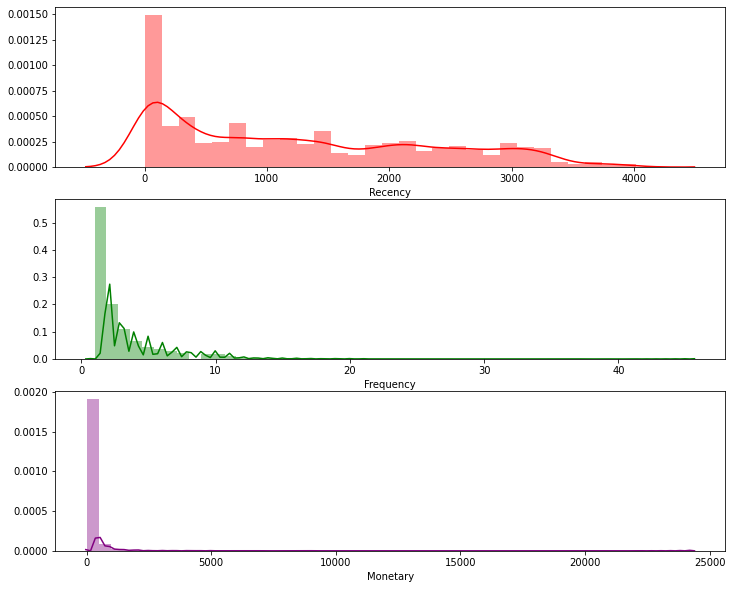

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); 
sns.distplot(RFM['Recency'],color='r')
# Plot distribution of F
plt.subplot(3, 1, 2); 
sns.distplot(RFM['Frequency'],color='g')
# Plot distribution of M
plt.subplot(3, 1, 3); 
sns.distplot(RFM['Monetary'],color='purple')



In [ ]:
RFM.describe()

,Customer id,Frequency,Monetary,Recency,RFM_Score
count,18417.000000,18417.000000,18417.000000,18417.000000,18417.000000
mean,137573.510887,2.782375,173.445453,1253.037900,9.925992
std,69504.599881,2.936888,540.339224,1081.437868,4.129660
min,10.000000,1.000000,5.000000,1.000000,3.000000
25%,81990.000000,1.000000,30.000000,244.000000,7.000000
50%,136430.000000,2.000000,60.000000,1070.000000,10.000000
75%,195100.000000,3.000000,150.000000,2130.000000,13.000000
max,264200.000000,45.000000,24350.000000,4014.000000,24.000000


In [ ]:
rfm_level_agg1['percentage contribution']=round((rfm_level_agg1[( 'Monetary',   'sum')]/np.sum(rfm_level_agg1[( 'Monetary',   'sum')])*100),2)

In [ ]:
rfm_level_agg1

Recency Frequency  ...   Monetary percentage contribution
                      mean      mean  ...        sum                        
RFM_Level                             ...                                   
Can't Loose Them      24.8      38.2  ...     5968.2                    0.19
Champions             40.7      18.0  ...   117291.9                    3.67
Lost Customer       2741.0       1.1  ...    63890.3                    2.00
Loyal                 57.1       8.6  ...   943068.6                   29.52
Needs Attention     1165.8       1.8  ...   254479.2                    7.97
Potential            238.8       4.9  ...  1042893.5                   32.65
Promising            698.5       2.8  ...   583108.2                   18.25
Require Activation  1769.7       1.4  ...   183645.0                    5.75

[8 rows x 6 columns]